/home/cuquantum/conda/envs/cuquantum-23.10/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<IPython.core.display.Latex object>

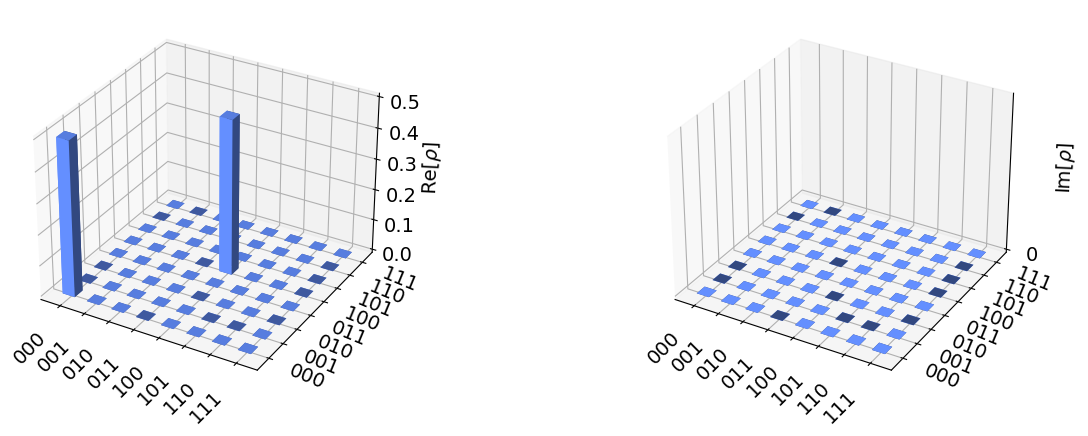

Statevector([ 0.70710678+0.j,  0.        +0.j,  0.        +0.j,
              0.        +0.j, -0.70710678+0.j,  0.        +0.j,
              0.        +0.j,  0.        +0.j],
            dims=(2, 2, 2))


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

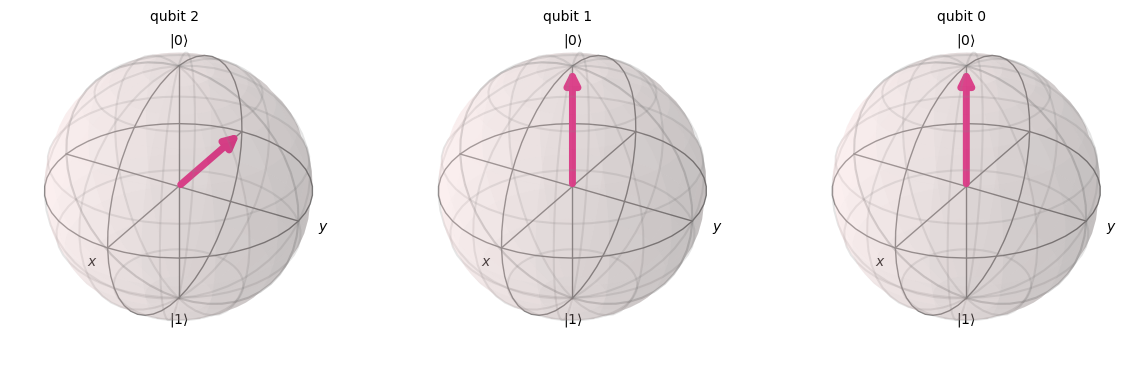

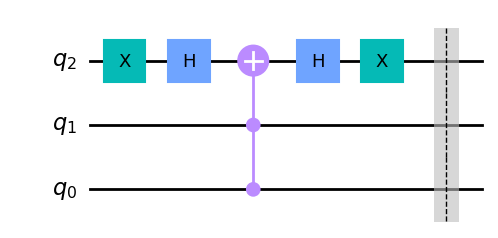

<IPython.core.display.Latex object>

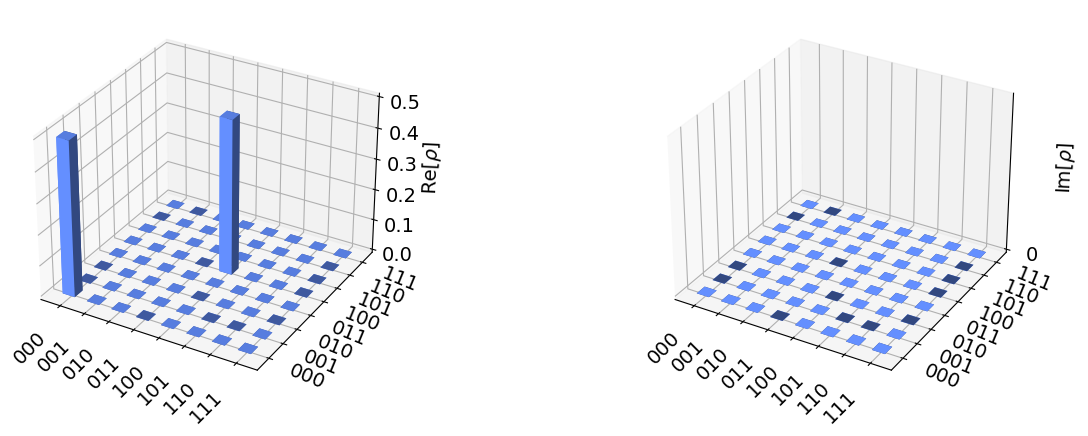

Statevector([ 0.70710678+0.j,  0.        +0.j,  0.        +0.j,
              0.        +0.j, -0.70710678+0.j,  0.        +0.j,
              0.        +0.j,  0.        +0.j],
            dims=(2, 2, 2))


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

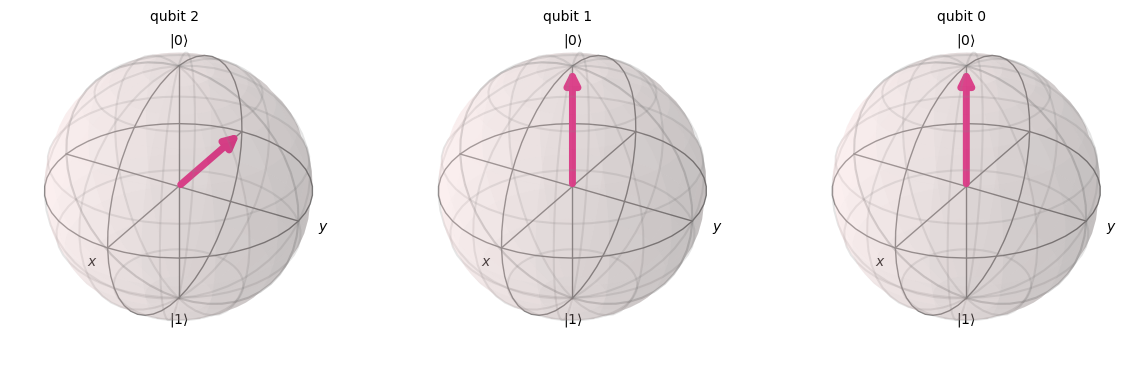

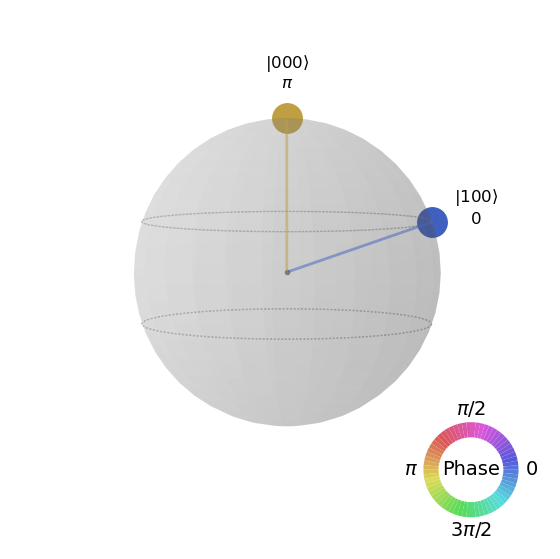

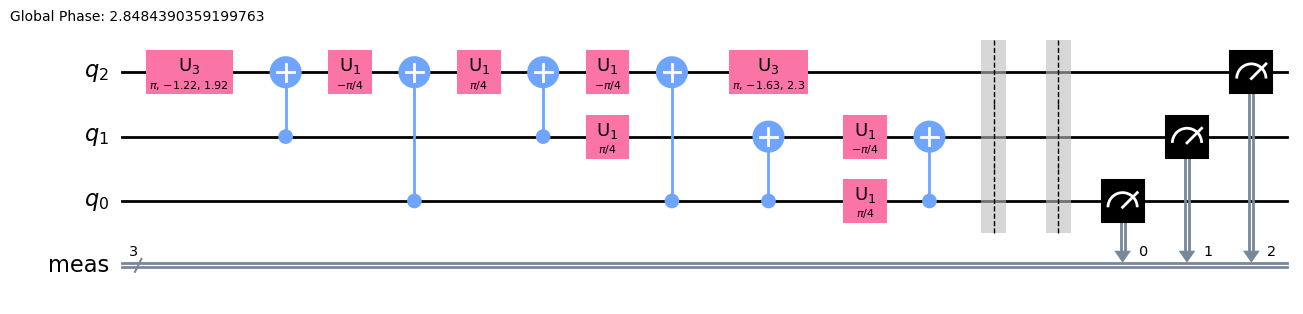

<IPython.core.display.Latex object>

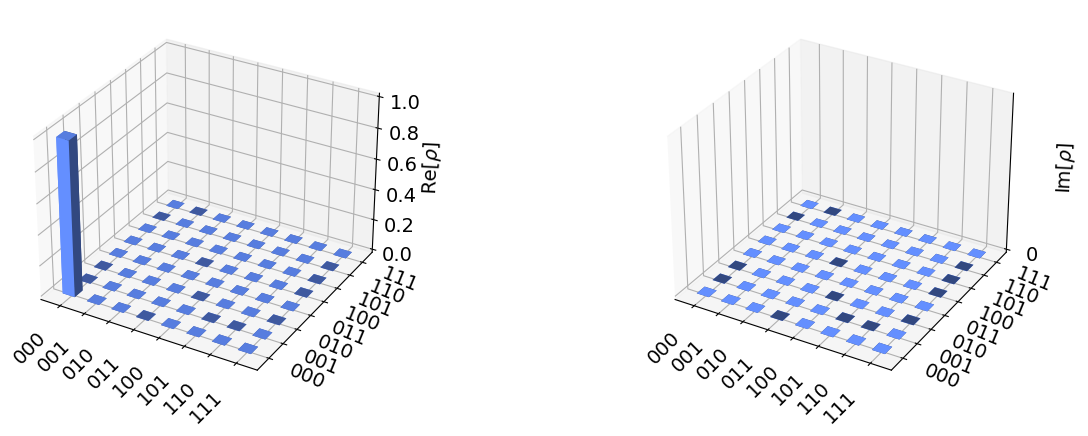

Statevector([ 1.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
              0.00000000e+00+0.j, -2.23711432e-17+0.j,  0.00000000e+00+0.j,
              0.00000000e+00+0.j,  0.00000000e+00+0.j],
            dims=(2, 2, 2))


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

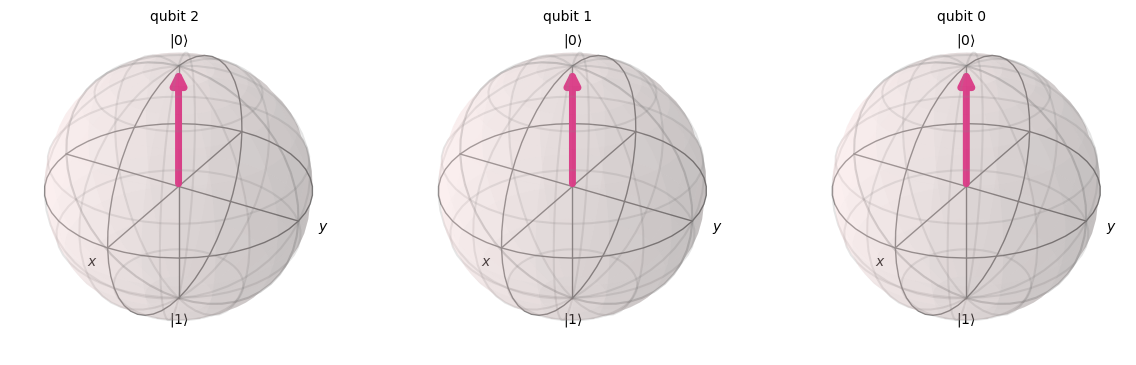

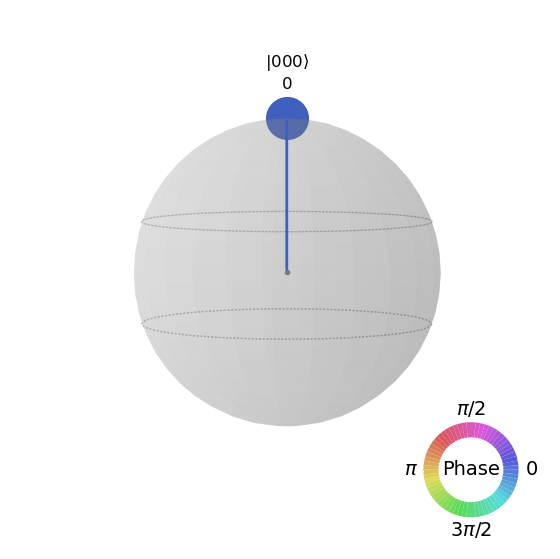

[1707700542.234416] [96076cb4b4ac:287279:0]     ucp_context.c:1014 UCX  WARN  transports 'rc','gdr_copy' are not available, please use one or more of: cma, cuda, cuda_copy, cuda_ipc, mm, posix, self, shm, sm, sysv, tcp
[1707700542.265186] [96076cb4b4ac:287279:0]          parser.c:1908 UCX  WARN  unused env variable: UCX_IB_PCI_RELAXED_ORDERING (set UCX_WARN_UNUSED_ENV_VARS=n to suppress this warning)
{'000': 1024}


In [1]:
import qiskit.quantum_info as qi
from qiskit.visualization import plot_state_city, array_to_latex, plot_bloch_multivector, plot_state_qsphere
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer, transpile
import numpy as np

simulator = Aer.get_backend('aer_simulator_statevector')

circuit = QuantumCircuit(3)

circuit.x(2)
circuit.h(2)

op0 = qi.Operator.from_circuit(circuit)

display(array_to_latex(op0))

dm0 = qi.DensityMatrix.from_instruction(circuit)

display(plot_state_city(dm0))

state0 = qi.Statevector(circuit)

print(state0)

display(state0.draw(output="latex"))

display(array_to_latex(state0))

display(plot_bloch_multivector(state0,reverse_bits=True))

circuit.ccx(0,1,2) # Black Box marking operation

op1 = qi.Operator.from_circuit(circuit)

dm1 = qi.DensityMatrix.from_instruction(circuit)

state1 = qi.Statevector(circuit)

circuit.h(2)
circuit.x(2)

op2 = qi.Operator.from_circuit(circuit)

state2 = qi.Statevector(circuit)

dm2 = qi.DensityMatrix.from_instruction(circuit)

circuit.barrier()

transpiled_circuit = circuit.copy()

transpiled_circuit.measure_all()

display(circuit.draw("mpl", reverse_bits=True))

display(array_to_latex(op1))

display(plot_state_city(dm1))

print(state1)

display(array_to_latex(state1))

display(state1.draw(output="latex"))

display(plot_bloch_multivector(state1,reverse_bits=True))

display(plot_state_qsphere(state1.data,show_state_phases=True))

transpiled_circuit = transpile(transpiled_circuit, simulator)

display(transpiled_circuit.draw("mpl", reverse_bits=True))

display(array_to_latex(op2))

display(plot_state_city(dm2))

print(state2)

display(array_to_latex(state2))

display(state2.draw(output="latex"))

display(plot_bloch_multivector(state2,reverse_bits=True))

display(plot_state_qsphere(state2.data,show_state_phases=True))

job = simulator.run(transpiled_circuit)
result = job.result()

print(result.get_counts())


<IPython.core.display.Latex object>

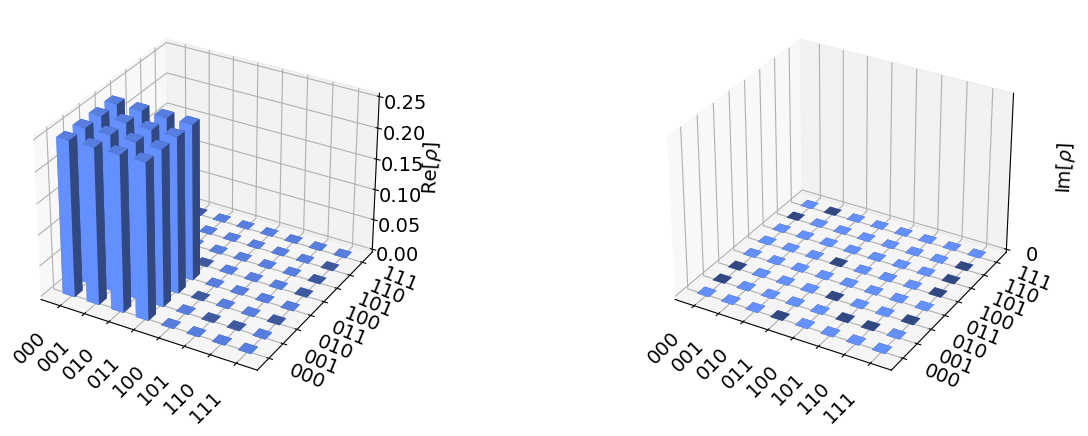

Statevector([ 5.00000000e-01+0.j,  5.00000000e-01+0.j,  5.00000000e-01+0.j,
              5.00000000e-01+0.j, -4.17307231e-17+0.j,  1.37804281e-17+0.j,
              2.78957589e-18+0.j, -3.04944199e-34+0.j],
            dims=(2, 2, 2))


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

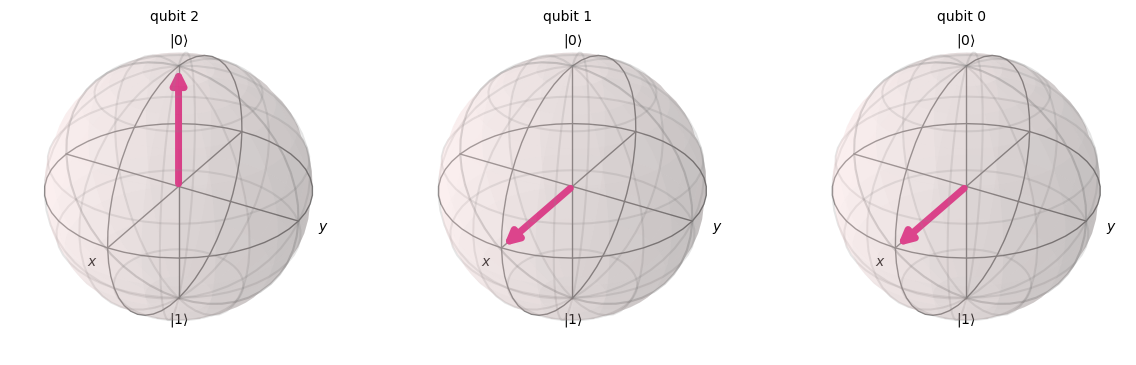

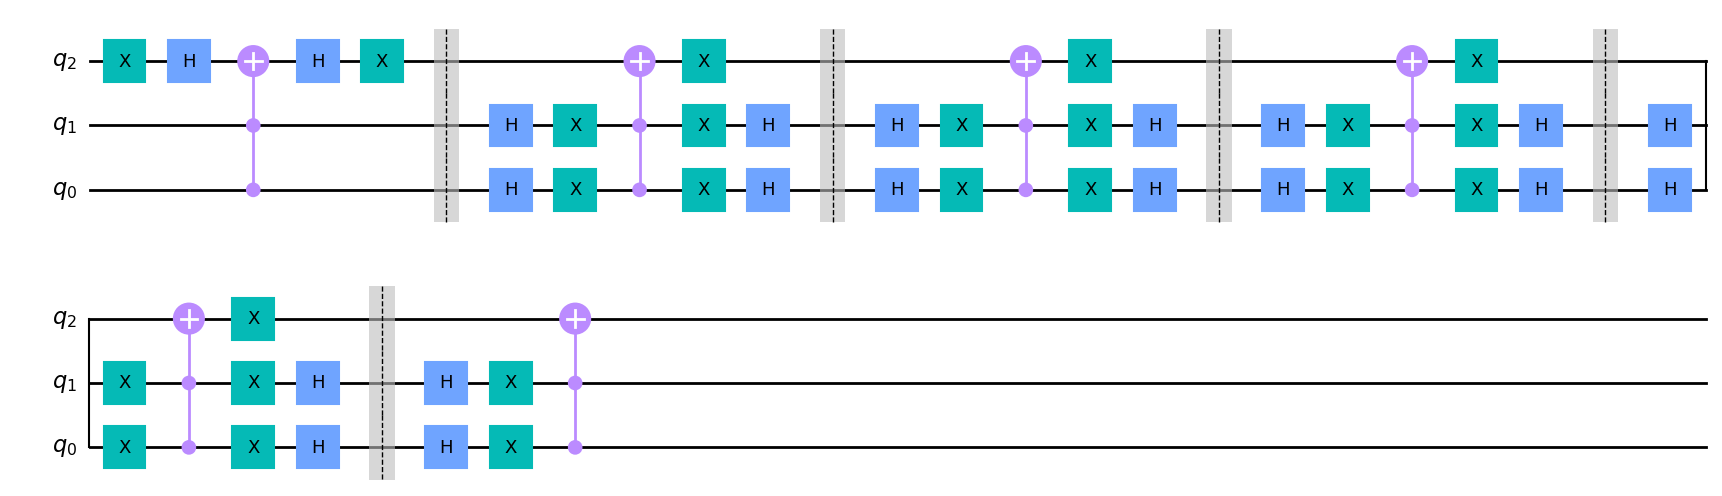

<IPython.core.display.Latex object>

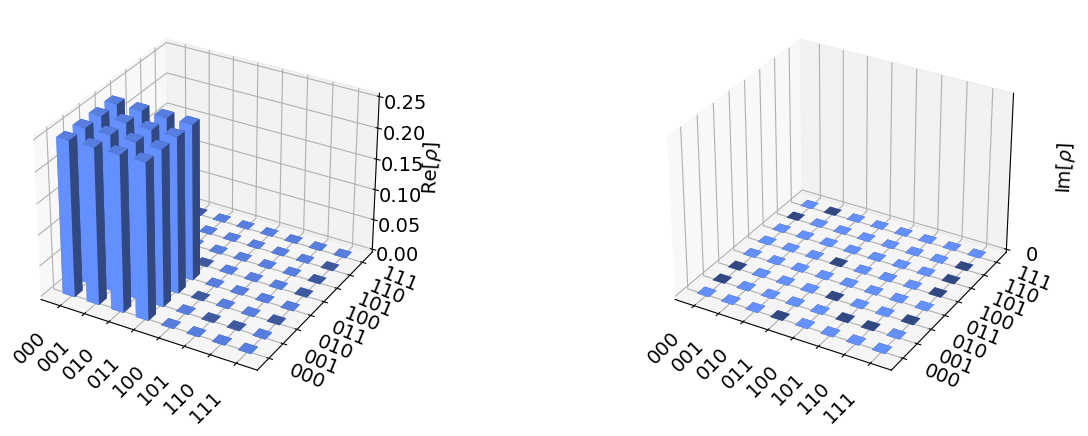

Statevector([ 5.00000000e-01+0.j,  5.00000000e-01+0.j,  5.00000000e-01+0.j,
              5.00000000e-01+0.j, -3.04944199e-34+0.j,  2.78957589e-18+0.j,
              1.37804281e-17+0.j, -4.17307231e-17+0.j],
            dims=(2, 2, 2))


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

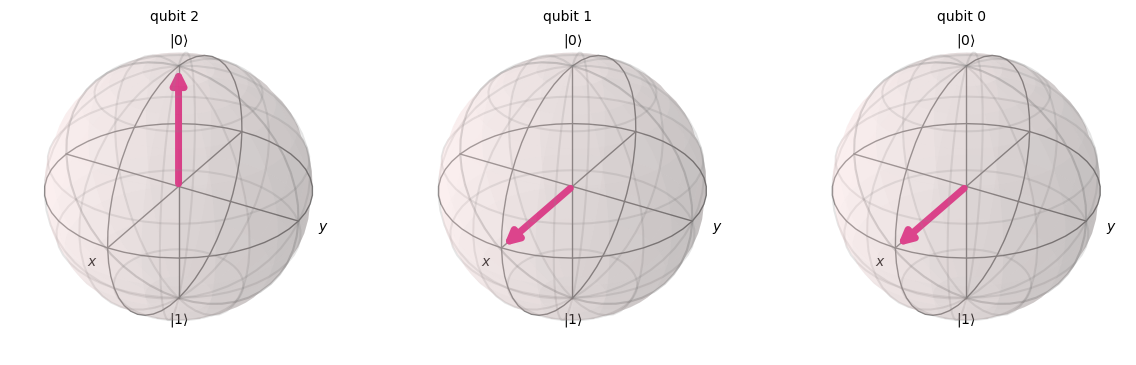

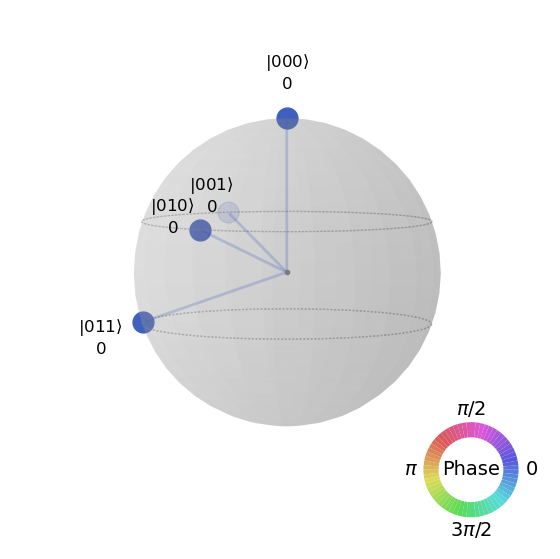

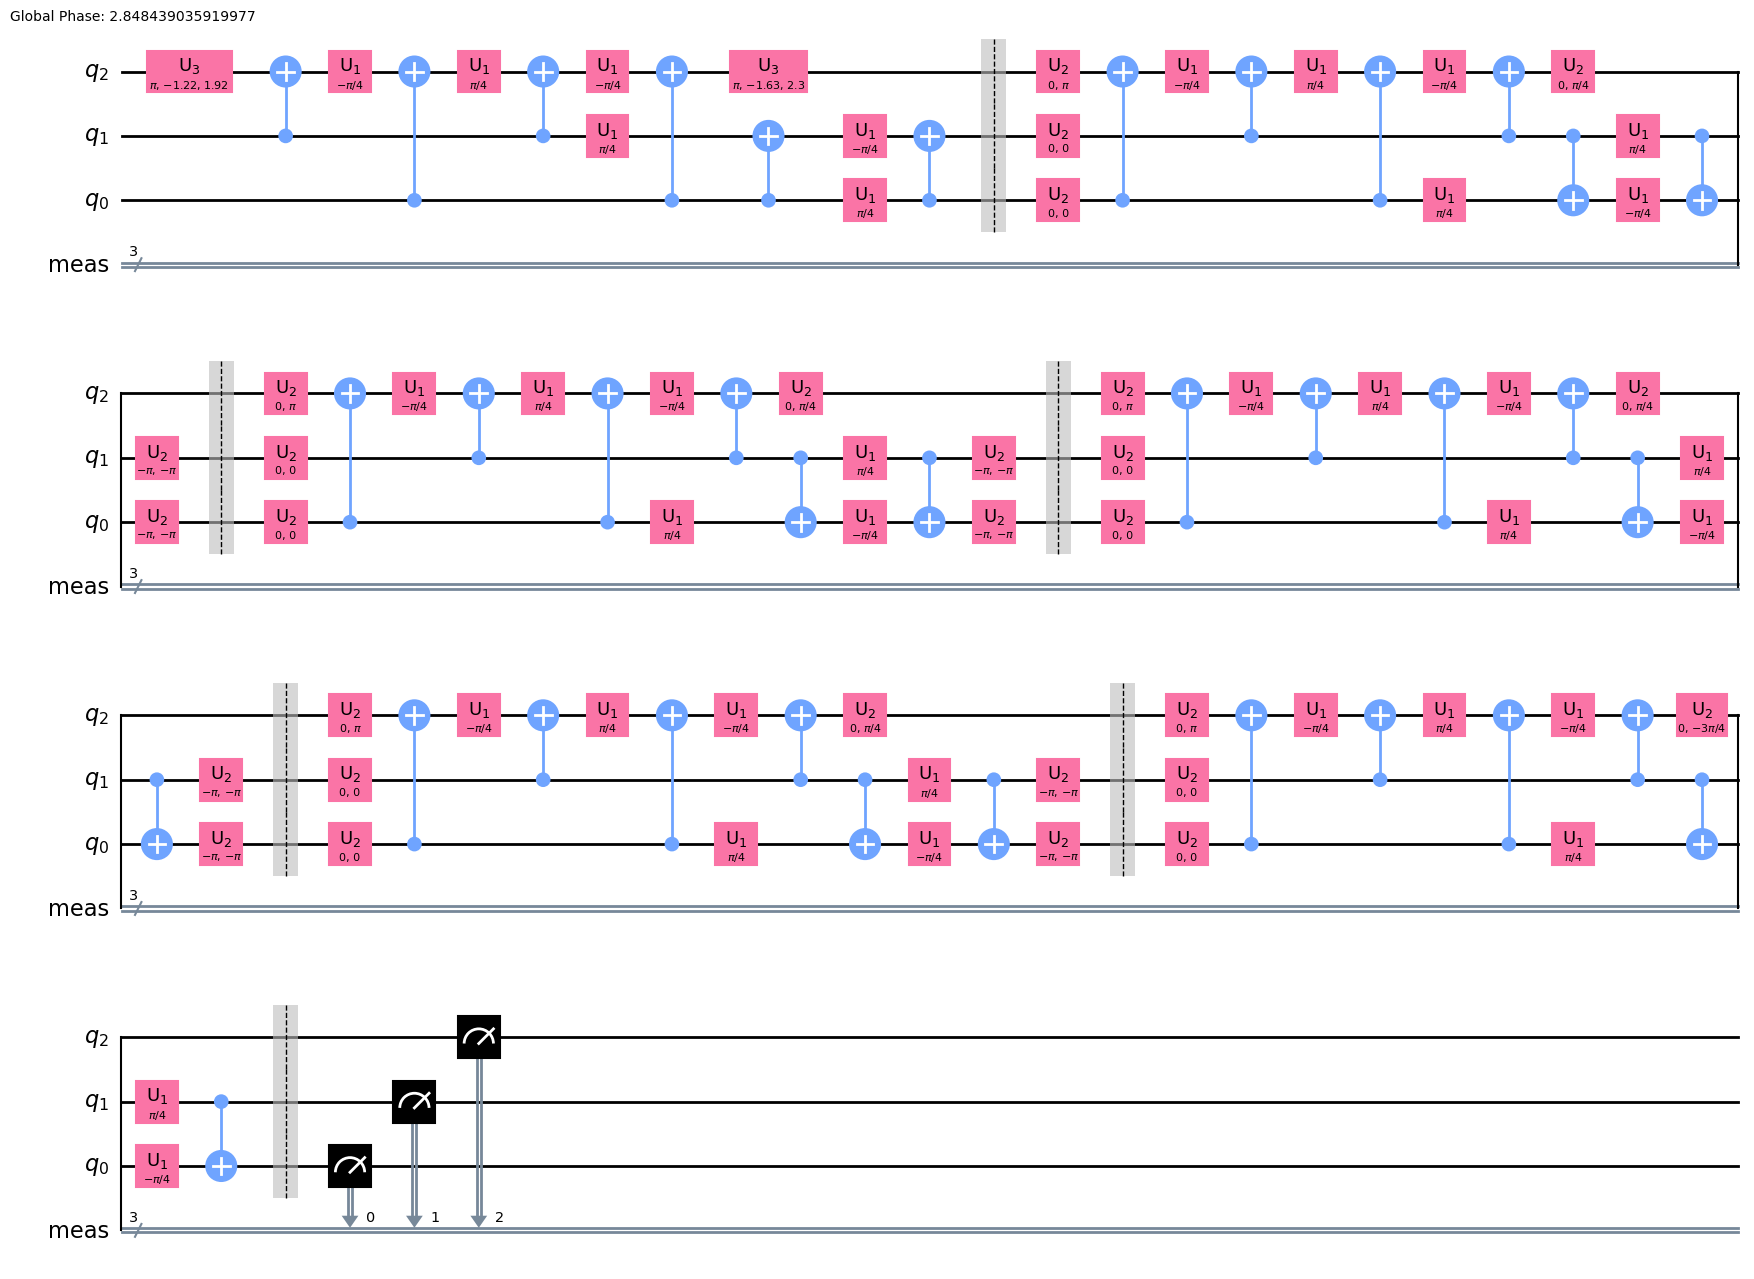

<IPython.core.display.Latex object>

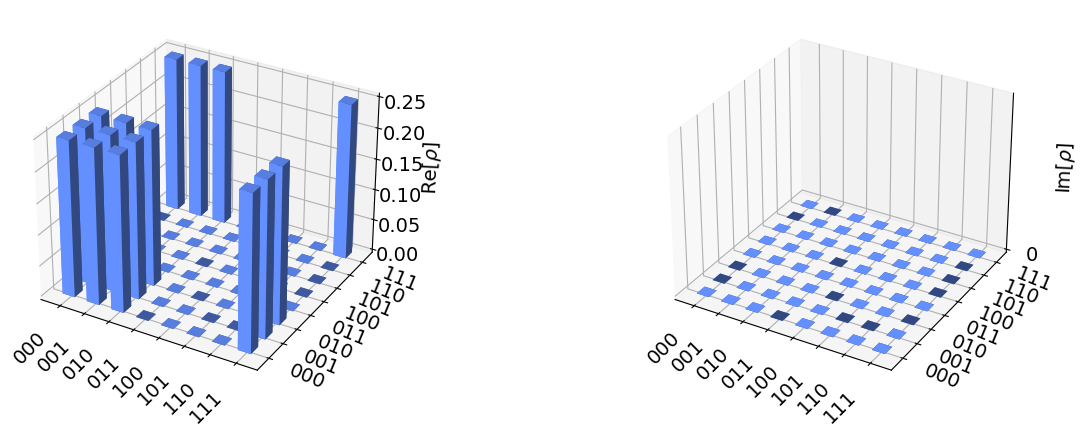

Statevector([ 5.00000000e-01+0.j,  5.00000000e-01+0.j,  5.00000000e-01+0.j,
             -4.17307231e-17+0.j, -3.04944199e-34+0.j,  2.78957589e-18+0.j,
              1.37804281e-17+0.j,  5.00000000e-01+0.j],
            dims=(2, 2, 2))


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

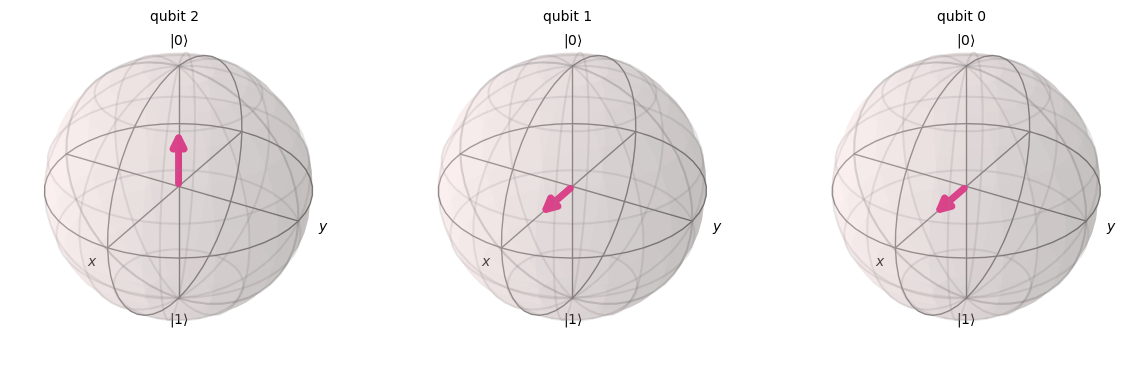

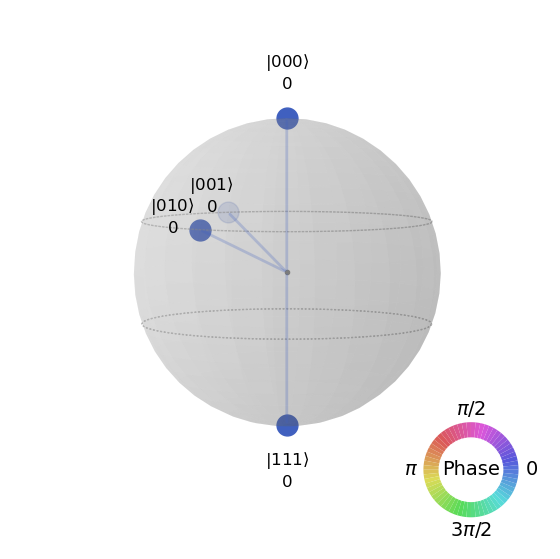

{'010': 228, '111': 260, '000': 261, '001': 275}


In [10]:

#step 1
circuit.h(1)
circuit.h(0)

op0 = qi.Operator.from_circuit(circuit)

display(array_to_latex(op0))

dm0 = qi.DensityMatrix.from_instruction(circuit)

display(plot_state_city(dm0))

state0 = qi.Statevector(circuit)

print(state0)

display(state0.draw(output="latex"))

display(array_to_latex(state0))

display(plot_bloch_multivector(state0,reverse_bits=True))

#step 2
circuit.x(1)
circuit.x(0)

op1 = qi.Operator.from_circuit(circuit)

dm1 = qi.DensityMatrix.from_instruction(circuit)

state1 = qi.Statevector(circuit)

circuit.ccx(1,0,2)

op2 = qi.Operator.from_circuit(circuit)

state2 = qi.Statevector(circuit)

dm2 = qi.DensityMatrix.from_instruction(circuit)

transpiled_circuit = circuit.copy()

transpiled_circuit.measure_all()

display(circuit.draw("mpl", reverse_bits=True))

display(array_to_latex(op1))

display(plot_state_city(dm1))

print(state1)

display(array_to_latex(state1))

display(state1.draw(output="latex"))

display(plot_bloch_multivector(state1,reverse_bits=True))

display(plot_state_qsphere(state1.data,show_state_phases=True))

transpiled_circuit = transpile(transpiled_circuit, simulator)

display(transpiled_circuit.draw("mpl", reverse_bits=True))

display(array_to_latex(op2))

display(plot_state_city(dm2))

print(state2)

display(array_to_latex(state2))

display(state2.draw(output="latex"))

display(plot_bloch_multivector(state2,reverse_bits=True))

display(plot_state_qsphere(state2.data,show_state_phases=True))

job = simulator.run(transpiled_circuit)
result = job.result()

print(result.get_counts())


<IPython.core.display.Latex object>

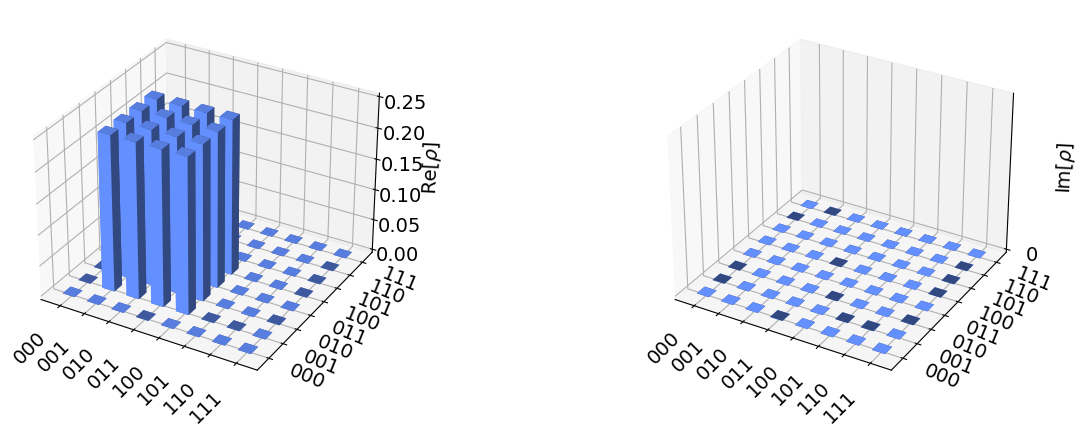

Statevector([-4.17307231e-17+0.j,  5.00000000e-01+0.j,  5.00000000e-01+0.j,
              5.00000000e-01+0.j,  5.00000000e-01+0.j,  1.37804281e-17+0.j,
              2.78957589e-18+0.j, -3.04944199e-34+0.j],
            dims=(2, 2, 2))


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

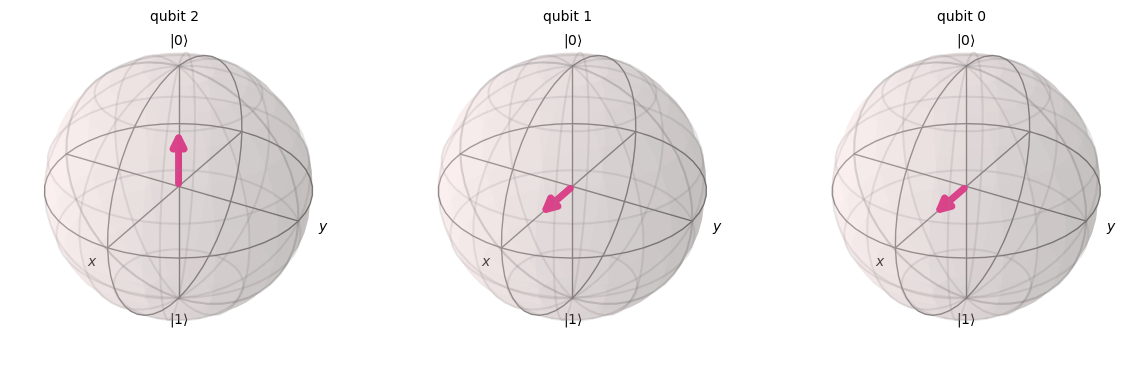

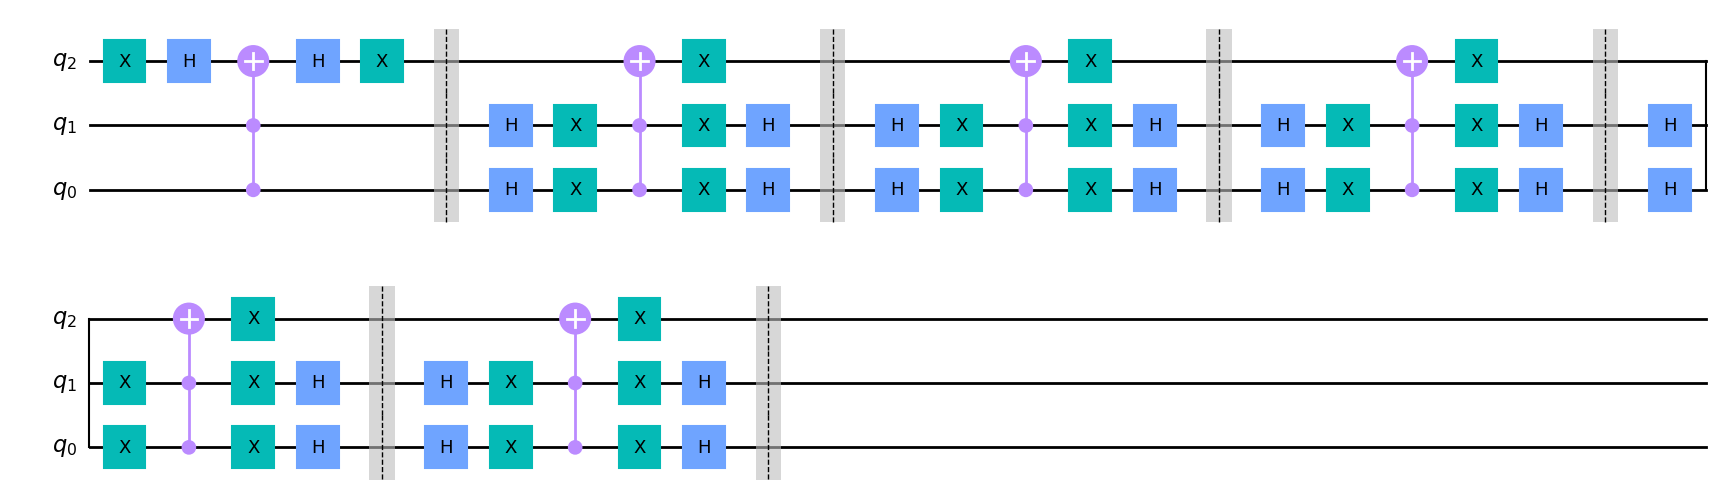

<IPython.core.display.Latex object>

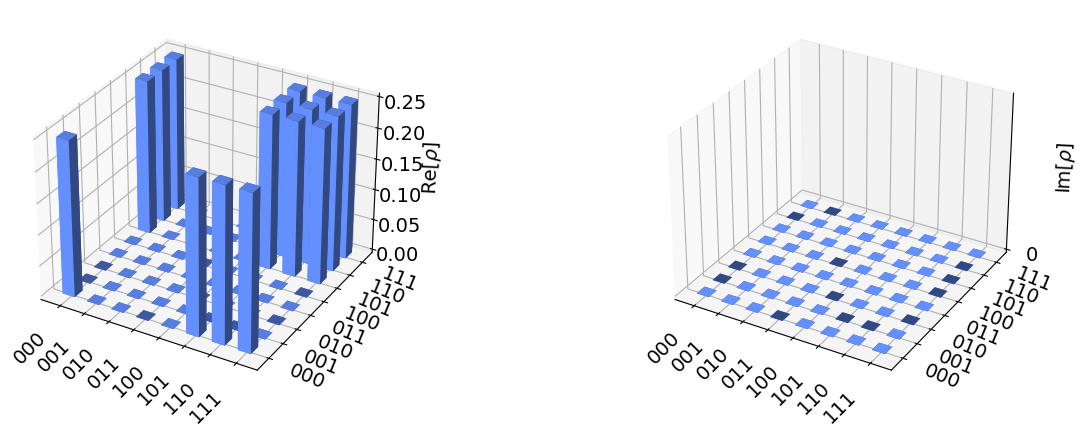

Statevector([ 5.00000000e-01+0.j,  1.37804281e-17+0.j,  2.78957589e-18+0.j,
             -3.04944199e-34+0.j, -4.17307231e-17+0.j,  5.00000000e-01+0.j,
              5.00000000e-01+0.j,  5.00000000e-01+0.j],
            dims=(2, 2, 2))


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

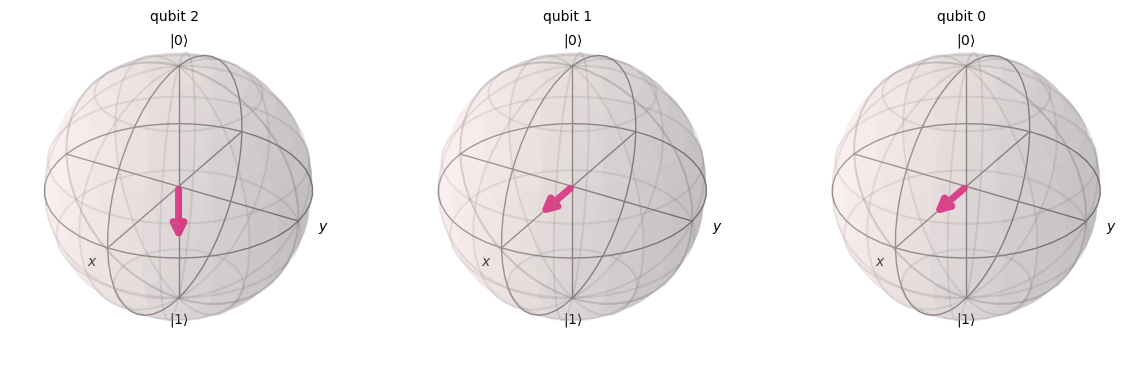

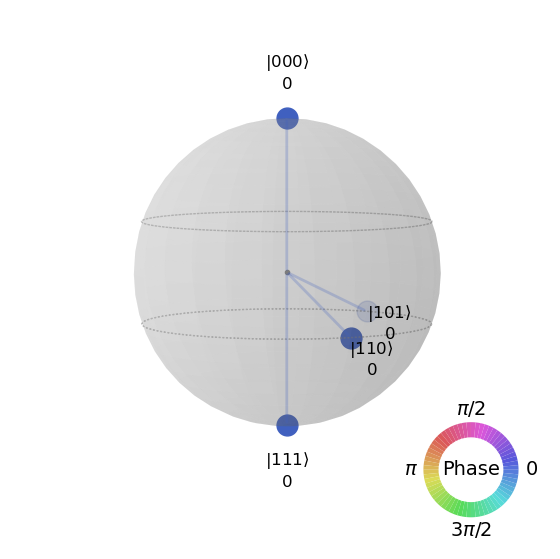

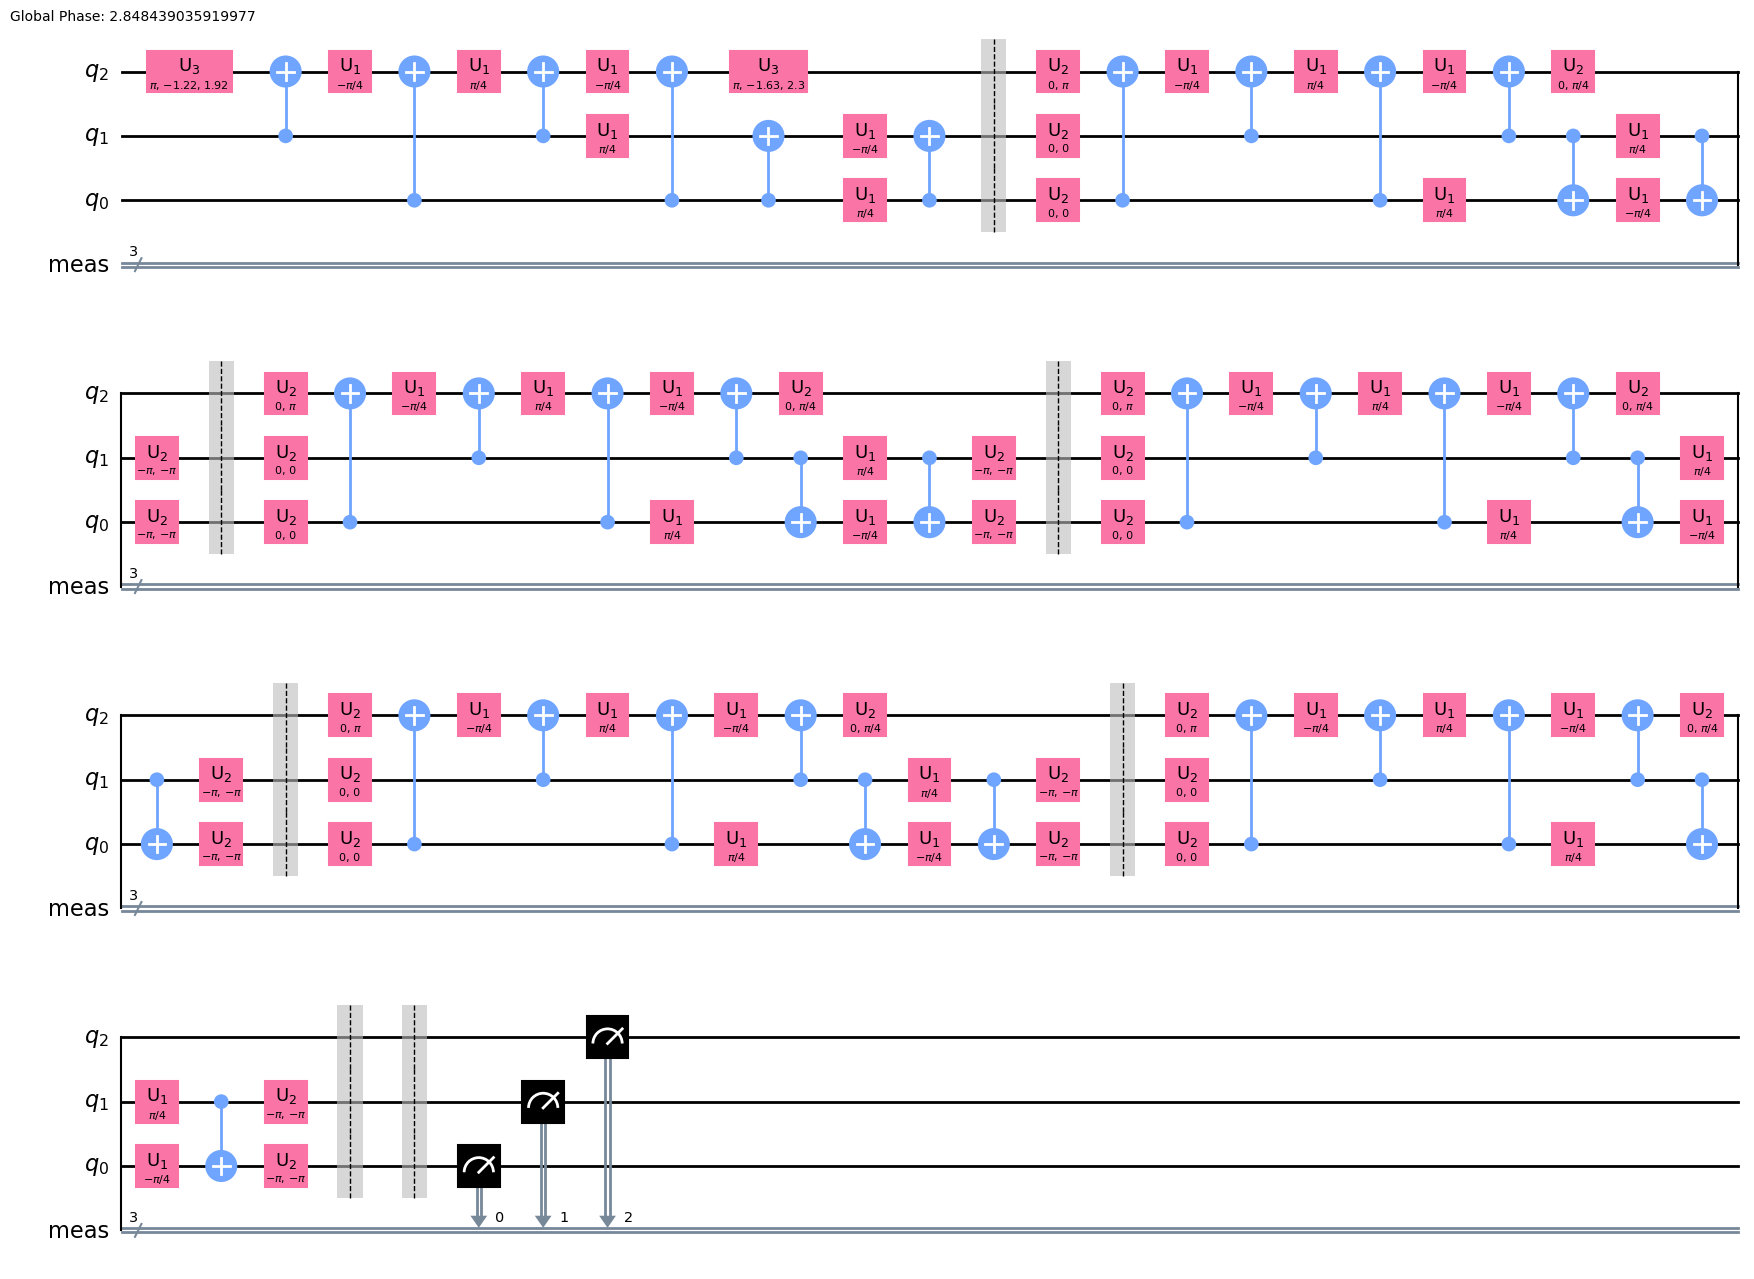

<IPython.core.display.Latex object>

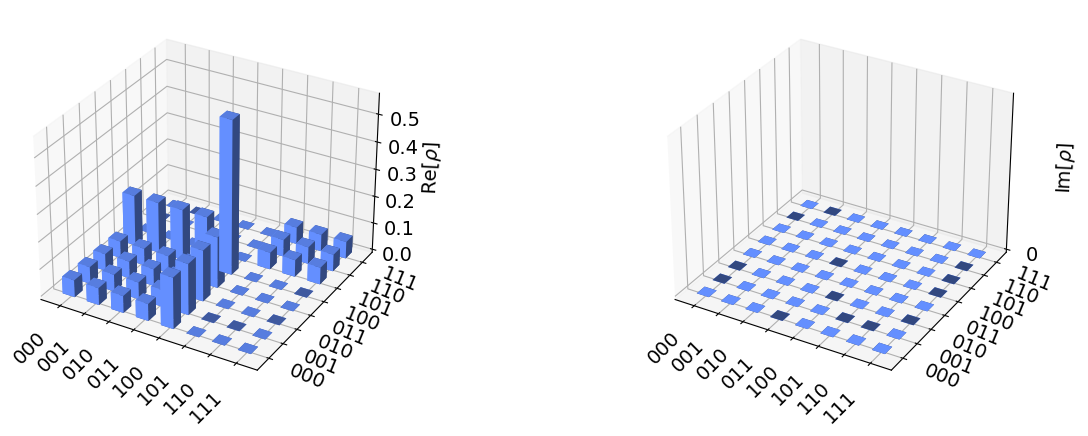

Statevector([ 0.25+0.j,  0.25+0.j,  0.25+0.j,  0.25+0.j,  0.75+0.j,
             -0.25+0.j, -0.25+0.j, -0.25+0.j],
            dims=(2, 2, 2))


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

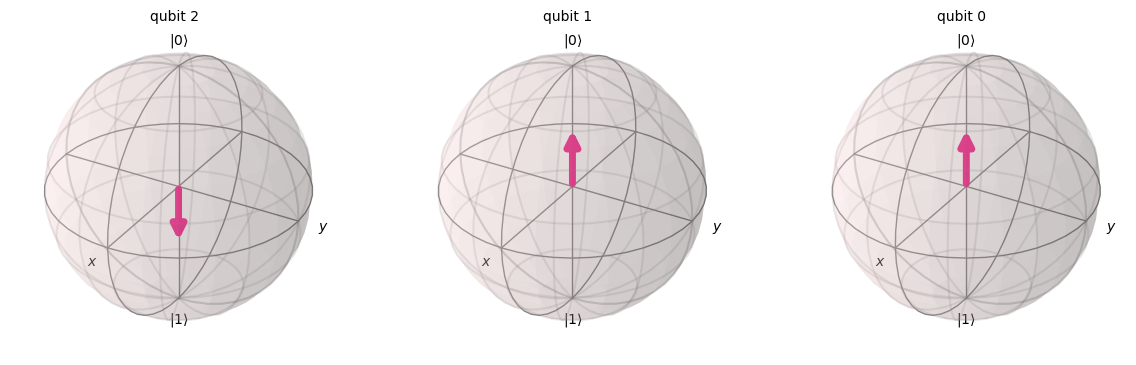

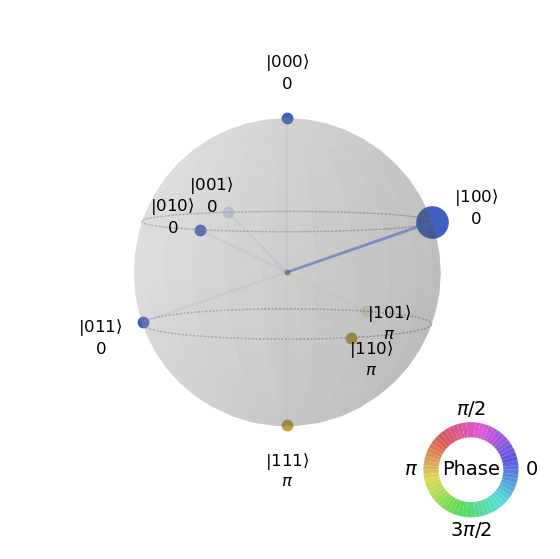

{'111': 65, '101': 72, '001': 68, '011': 50, '100': 575, '010': 65, '000': 65, '110': 64}


In [11]:

#step 4
circuit.x(1)
circuit.x(0)

op0 = qi.Operator.from_circuit(circuit)

display(array_to_latex(op0))

dm0 = qi.DensityMatrix.from_instruction(circuit)

display(plot_state_city(dm0))

state0 = qi.Statevector(circuit)

print(state0)

display(state0.draw(output="latex"))

display(array_to_latex(state0))

display(plot_bloch_multivector(state0,reverse_bits=True))

#step 5
circuit.x(2)

op1 = qi.Operator.from_circuit(circuit)

dm1 = qi.DensityMatrix.from_instruction(circuit)

state1 = qi.Statevector(circuit)

#step 6
circuit.h(1)
circuit.h(0)

op2 = qi.Operator.from_circuit(circuit)

state2 = qi.Statevector(circuit)

dm2 = qi.DensityMatrix.from_instruction(circuit)

circuit.barrier()

transpiled_circuit = circuit.copy()

transpiled_circuit.measure_all()

display(circuit.draw("mpl", reverse_bits=True))

display(array_to_latex(op1))

display(plot_state_city(dm1))

print(state1)

display(array_to_latex(state1))

display(state1.draw(output="latex"))

display(plot_bloch_multivector(state1,reverse_bits=True))

display(plot_state_qsphere(state1.data,show_state_phases=True))

transpiled_circuit = transpile(transpiled_circuit, simulator)

display(transpiled_circuit.draw("mpl", reverse_bits=True))

display(array_to_latex(op2))

display(plot_state_city(dm2))

print(state2)

display(array_to_latex(state2))

display(state2.draw(output="latex"))

display(plot_bloch_multivector(state2,reverse_bits=True))

display(plot_state_qsphere(state2.data,show_state_phases=True))

job = simulator.run(transpiled_circuit)
result = job.result()

print(result.get_counts())
